# Brands and products emotion dataset analisys 

In [1]:
#Importing important stuff
import nltk
import string
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#weee

In [2]:
#Loading in dataset
path_to_dataset = 'tweets.csv'
df = pd.read_csv(path_to_dataset, dtype=str)

In [3]:
df = df.rename(columns = { 'emotion_in_tweet_is_directed_at':'products',
            'is_there_an_emotion_directed_at_a_brand_or_product':'emotions'})
df = df.set_index('index')

## Entry analisys

In [4]:
df.describe()

,tweet_text,products,emotions
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [5]:
products= df['products'].value_counts(dropna=False)
emotions=df['emotions'].value_counts(dropna=False)

Text(0.5, 1.0, 'Opinions on product distribution')

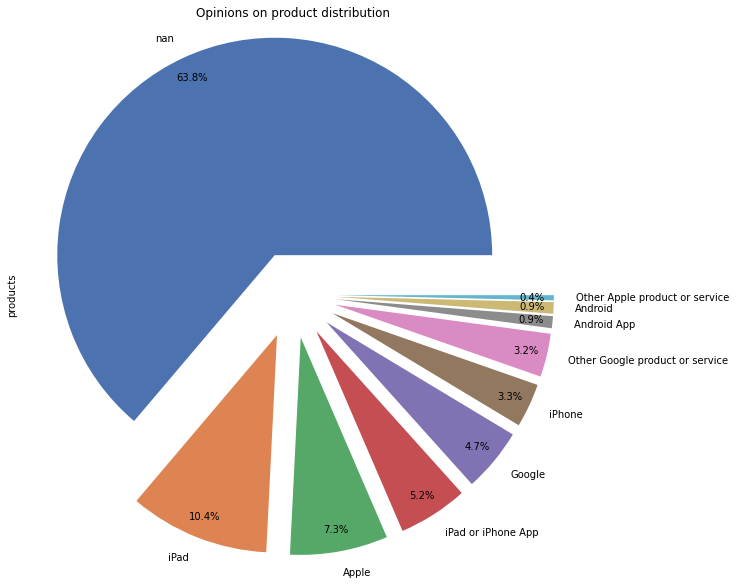

In [14]:
distance = [0.2 for i in products]
labels = ['' for i in products]
colors = sns.color_palette('deep')

plt.figure(figsize=(10,10))
ax = products.plot.pie(autopct='%1.1f%%', colors=colors, explode=distance, grid=False, pctdistance=0.90)
ax.set_title('Opinions on product distribution')

<AxesSubplot:ylabel='emotions'>

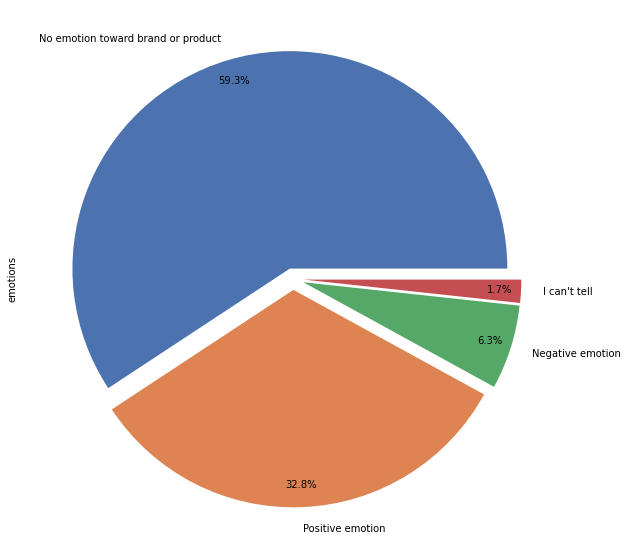

In [ ]:

ax3 = df.emotions.value_counts(dropna=False)
distanceEmotions = [0.05 for i in ax3]
plt.figure(figsize=(10,10))
ax3.plot.pie(autopct='%1.1f%%', colors=colors, explode=distanceEmotions, grid=False, pctdistance=0.90)

In [ ]:
emotions

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotions, dtype: int64

As we can see, there is lots of unassigned data, in both emotions and product columns. Because of that we have unbalanced data, meaning there is an overwelimg ammount of one fature in dataset. 
If we would try to train neural network on unbalanced data, we would overvit network to classify most of the currences to dominant feature.
 
What can we do to prevent such thing? We can balance our data set. Basicaly we try to match size of smallest feature in our data set. In case of 'Emotions' column that would mean to fit size of 'Positive emotion' to size of 'Negative emotion'. Quick math: 6.3% of 9093 is 572, that means that we should only use 572 of examples from 'Positive Emotions' (we don't want to use 'No Emotions' because this won't help us with deteminating if tweet is possitive or negative).

## Text normalization

In [ ]:
df.tweet_text = df.tweet_text.astype(str)

In [ ]:
df.tweet_text = df.tweet_text.apply(lambda x: x.lower())

In [ ]:
def cleanseText(textColumn):
    textColumn = textColumn.apply(lambda x: re.sub("@\w+","",x))
    textColumn = textColumn.apply(lambda x: x.lower())
    textColumn = textColumn.apply(lambda x: re.sub(r'\d+','',x))
    textColumn = textColumn.apply(lambda x: re.sub(r'{link}','',x))
    textColumn = textColumn.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    textColumn = textColumn.apply(lambda x: x.strip())

    return textColumn
    

In [ ]:
def Tokenization(TextColumn):
    uslessWords = set(stopwords.words('english'))

In [ ]:
df.tweet_text = cleanseText(df.tweet_text)

In [ ]:
df.tweet_text.head(30)

index
0     i have a g iphone after  hrs tweeting at risea...
1     know about   awesome ipadiphone app that youll...
2     can not wait for ipad  also they should sale t...
3     i hope this years festival isnt as crashy as t...
4     great stuff on fri sxsw marissa mayer google t...
5     new ipad apps for speechtherapy and communicat...
6                                                   nan
7     sxsw is just starting ctia is around the corne...
8     beautifully smart and simple idea rt   wrote a...
9     counting down the days to sxsw plus strong can...
10    excited to meet the  at sxsw so i can show the...
11    find amp start impromptu parties at sxsw with ...
12    foursquare ups the game just in time for sxsw ...
13    gotta love this sxsw google calendar featuring...
14         great sxsw ipad app from  httptinyurlcomnqvl
15    haha awesomely rad ipad app by  httpbitlyhtdfi...
16    holler gram for ipad on the itunes app store  ...
17    i just noticed dst is coming this we